MIS 382N: ADVANCED MACHINE LEARNING

Assignment 4

Total points: 75 + 5 bonus points

Due: Monday, November 2 to be submitted via Canvas by 11:59 pm

Your homework should be written in a python notebook. If you prefer, you can work in groups of two. **Please note that only one student per team needs to submit the assignment on Canvas but make sure to include both students' names and UT EIDs.**

For any question that requires a handwritten solution, you may upload scanned images of your solution in the notebook or attach them to the assignment . You may write your solution using markdown as well.

Please make sure your code runs and the graphs and figures are displayed in your notebook before submitting. (%matplotlib inline)

**Additionally, upload any images you plan to incorporate in your notebook as attachments so we can see them in case the uploaded images don't appear properly on our end.**

**This can be an individual assignment or group of 2. If you choose to do it as a group, please specify who you are working with (name and EID), then only one student should submit the homework. Put your name and eid here.**

Name: Parthiv Borgohain

EID: pb25347

Name: Manvi Goyal

EID: mg65952

# Question 1: Expected Loss Minimization [10 pts]
Consider a binary classification problem with the following loss matrix -
$$
   {\begin{array}{ccccc}
   & & \text{Predicted class} & \text{           } &\\
   & & C1 & C2 & Reject\\
   \text{True class} & C1 & 0 & r & c  \\
   & C2 & s & 0 & c \\
  \end{array} } 
$$

where the cost of rejection is a constant, and the costs $r$ and $s$ are positive real numbers. Let $f(x)=P(C1|x)$.


**(a) [2.5 points]** Show that the expected loss when $x$ is labelled as $C_1$ is a decreasing function of $f(x)$ while expected loss when $x$ is labelled as $C_2$ is a increasing function of $f(x)$.  

**(b) [2.5 points]** For $c=0$, show that the decision which minimizes the expected loss is to reject all instances of $x$

**(c) [2.5 points]** Let $r=5$ and $s=2$, what is the minimum value of $c$ such that no instance of $x$ gets rejected (irrespective of  $f(x)$)?

**(d) [2.5 points]** Let $r=7$, $s=4$, and $c=3$. Determine the  ranges of $f(x)$ for which the optimal decision is C1, reject and C2 respectively.

## Solutions:

**(a)** This has been proven in the attached PDF File Below

**(b)** This has been proven in the attached PDF File Below

**(c)** The minimum value of c is 10/7. Detailed working for this is shown in the attached PDF File below.

**(d)** For f(x) >= 4/11, we choose C1

For f(x) <=4/11, we choose C2

We never use the reject option for any value of f(x)

Detailed working for this is shown in the attached PDF file below.

**Please run the below block of code!!**

In [1]:
class PDF(object):
    def __init__(self, pdf, size=(200,200)):
        self.pdf = pdf
        self.size = size

    def _repr_html_(self):
        return '<iframe src={0} width={1[0]} height={1[1]}></iframe>'.format(self.pdf, self.size)

    def _repr_latex_(self):
        return r'\includegraphics[width=1.0\textwidth]{{{0}}}'.format(self.pdf)

PDF('HW.pdf',size=(500,600))

# Question 2: Logistic Regression [5 points]
Consider the problem of predicting the success of students in their undergraduate degrees given their high school GPA and SAT scores. We have the variables $X_1 =$ high school GPA, $X_2$ = SAT score and Y = completing the undergraduate degree (binary). We then fit a logistic regression which produces coefficients, $β_0 = −7$, $β_1 = 2$, $β_2 = 0.001$ Estimate the probability that George who
has a GPA of 3.4 and an SAT score of 1500 will complete his undergraduate degree successfully according to this model. By how much will the probability increase if the GPA increases to 3.7, with other factors remaining the same?

## Solution:
Given,

$X_1 =$ high school GPA = 3.4 (for George)

$X_2$ = SAT score = 1500 (for George)

$Y$ = completing the undergraduate degree (binary variable)

Also,

$$
Z = β_0 + (β_1)X_1 + (β_2)X_2
$$

$$
i.e. Z = -7 + 2X_1 + 0.001X_2
$$

$$
i.e. Z = -7 + (2*3.4) + (0.001*1500)
$$

$$
i.e. Z = 1.3
$$

So, **Probability(George completes his undergraduate degree successfully|SAT=1500,High School GPA=3.4)** = 
$$
  \frac{1}{1+e^{-z}}\
$$

$$
  =\frac{1}{1+e^{-1.3}}\
$$

$$
  =0.7858
$$

Now, we have-

$X_1 =$ high school GPA = 3.7

$X_2$ = SAT score = 1500

$Y$ = completing the undergraduate degree (binary variable)

Also,

$$
Z = β_0 + (β_1)X_1 + (β_2)X_2
$$

$$
i.e. Z = -7 + 2X_1 + 0.001X_2
$$

$$
i.e. Z = -7 + (2*3.7) + (0.001*1500)
$$

$$
i.e. Z = 1.9
$$

So, **Probability(George completes his undergraduate degree successfully|SAT=1500,High School GPA=3.7)** = 
$$
  \frac{1}{1+e^{-z}}\
$$

$$
  =\frac{1}{1+e^{-1.9}}\
$$

$$
  =0.8699
$$

So Probability increases by **0.0841** when GPA increases from **3.4 to 3.7**



# Question 2: Classification and Handling Class Imbalance [35 points + 5 bonus points]

In [ ]:
# Only use this code block if you are using Google Colab.
# If you are using Jupyter Notebook, please ignore this code block. You can directly upload the file to your Jupyter Notebook file systems.
from google.colab import files

## It will prompt you to select a local file. Click on “Choose Files” then select and upload the file. 
## Wait for the file to be 100% uploaded. You should see the name of the file once Colab has uploaded it.
uploaded = files.upload()

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix

df = pd.read_csv('customer_churn_telcom.csv')

df = df.iloc[: , 1:] #dropping first column which is unnecessary

In [58]:
# Printing the first five rows
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [59]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 

print_unique_col_values(df)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


## [5 points] Data Preprocessing 

(a) [1 pt] Some of the columns have values like - no internet service or no phone service. Replace these two values with with a simple No

In [60]:
# Replace values with No
df = df.replace('No internet service', 'No')
df = df.replace('No phone service', 'No')

(b) [1 pt] Convert all 'Yes' values to 1 and 'No' values to 0 <br>
(c) [1 pt] Convert all  'Female' values to 1 and 'Male' values to 0

In [61]:
# Changing values to 0/1

yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

df[yes_no_columns]=df[yes_no_columns].replace(to_replace=['No', 'Yes'], value=[0, 1])

df['gender']=df['gender'].replace(to_replace=['Female', 'Male'], value=[1, 0])

df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,0,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,0,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,0,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,1,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


(d) [2 pts] Perform one-hot encoding on the folowing columns: 'InternetService', 'Contract', 'PaymentMethod'

In [62]:
# One hot encoding for categorical columns
# Name your final dataframe df 2

# Your code here

df2 = df.copy()

df2 = pd.get_dummies(data=df2,columns=['InternetService', 'Contract', 'PaymentMethod'],drop_first=True)

df2.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,29.85,29.85,0,0,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,56.95,1889.50,0,0,0,1,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,53.85,108.15,1,0,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,42.30,1840.75,0,0,0,1,0,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,70.70,151.65,1,1,0,0,0,0,1,0


In [63]:
# Scaling
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])



e) [1 pt] Split the dataset into training and test using a 80-20 split with a random state of 15. Perform stratified sampling on the target variable while doing so. Split the training data further into training (80%) and validation sets (20%) with a random state of 15. Perform stratified sampling on the target variable while doing so.

Note: The 'stratify' parameter can be used for this in the train_test_split function. 

In [64]:
#Setting X and y
X = df2.drop(['Churn'],axis=1)
y = df2['Churn']

# Train test split
from sklearn.model_selection import train_test_split

#Splitting Dataset 80-20 into train and test
X_train1, X_test, y_train1, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

#Splitting Training Dataset 80-20 into train and validation
X_train, X_validation, y_train, y_validation = train_test_split(X_train1, y_train1, test_size=0.2, random_state=15, stratify=y_train1)

In [65]:
# With samples corresponding to the positive class being very low, we can clearly see the imbalance in our data 
print('Churn occurences in the training set \n', y_train.value_counts())
print('\n')
print('Churn occurences throughout the data \n', y.value_counts())

Churn occurences in the training set 
 0    3304
1    1196
Name: Churn, dtype: int64


Churn occurences throughout the data 
 0    5163
1    1869
Name: Churn, dtype: int64


## [15 points] Decision Trees, Logistic Regression, and MLP

Use the example provided [here](https://scikit-learn.org/stable/modules/tree.html) to get an idea of how to use sklearn's decision tree classifier.

Go through the documentation [here](https://scikit-learn.org/0.16/modules/generated/sklearn.linear_model.LogisticRegression.html) to understand how to use sklearn's logistic regression model.

Go through the documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) to understand how to use sklearn's MLP Model.

(a) [5 pts (+5 bonus points)] Train the three classifiers on the dataset and print confusion matrix on both - the validation data as well as the test data for all the three models (you can either use default parameters for MLP classifier or change them to obtain higher performance for additional bonus of 5 points). <br>
(b) [5 pts] Plot the ROC Curves for all the three classifiers in a single graph and display the AUC-ROC scores for all the classifiers in this plot as well. Use both the validation and the test data to plot these curves as well as to calculate the AUC-ROC scores. Use one graph for validation data and one graph for test data (all models for validation data in one graph and all models for test data in one graph - and use this scheme for plotting in all subsequent plotting questions). <br>
(c) [5 pts] Plot the Precision-Recall curves for all the three classifiers in a single graph. Use both the validation and the test data to plot these curves. Use one graph for validation data and one graph for test data.

Helpful resources can be found here - 
1. [sklearn.tree.DecisionTreeClassifier.score](https://github.com/scikit-learn/scikit-learn/blob/37ac6788c/sklearn/base.py#L625)
2.  [sklearn.linear_model.LogisticRegression.score](https://github.com/scikit-learn/scikit-learn/blob/37ac6788c/sklearn/base.py#L625)
3. [sklearn.neutral_network.MLPClassifier.score](https://github.com/scikit-learn/scikit-learn/blob/36958fb24/sklearn/base.py#L640)
4. [sklearn.metrics.plot_roc_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_roc_curve.html)
5. [sklearn.metrics_confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)

Note: In this question, we are using the default parameters for MLP classifier, but you can change these parameters to obtain higher accuracies. **For a bonus of 5 points, experiment with these parameters to obtain a higher performance (in terms of accuracy and AUC-ROC scores).**

In [80]:
# Decision Tree Classifier
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

# Answer here
clf = tree.DecisionTreeClassifier(random_state=10)
clf = clf.fit(X_train, y_train)

validation_pred_decision_tree = clf.predict(X_validation)
test_pred_decision_tree = clf.predict(X_test)
validation_proba_decision_tree = clf.predict_proba(X_validation)[::,1]
test_proba_decision_tree = clf.predict_proba(X_test)[::,1]

validation_cm=confusion_matrix(y_validation, validation_pred_decision_tree)
test_cm=confusion_matrix(y_test, test_pred_decision_tree)

print("Confusion Matrix for Validation Set:\n",validation_cm)
print("So, Accuracy on Validation Set is:",(validation_cm[0][0]+validation_cm[1][1])/(validation_cm[0][0]+validation_cm[1][1]+validation_cm[0][1]+validation_cm[1][0])*100)
print("So, Recall on Validation Set is:",(validation_cm[1][1])/(validation_cm[1][0]+validation_cm[1][1]))
print("So, Precision on Validation Set is:",(validation_cm[1][1])/(validation_cm[0][1]+validation_cm[1][1]))
print("So, F1 Score on Validation Set is:",(f1_score(y_validation,validation_pred_decision_tree)))

print("\n\nConfusion Matrix for Test Set:\n",test_cm)
print("So, Accuracy on Test Set is:",(test_cm[0][0]+test_cm[1][1])/(test_cm[0][0]+test_cm[1][1]+test_cm[0][1]+test_cm[1][0])*100)
print("So, Recall on Test Set is:",(test_cm[1][1])/(test_cm[1][0]+test_cm[1][1]))
print("So, Precision on Test Set is:",(test_cm[1][1])/(test_cm[0][1]+test_cm[1][1]))
print("So, F1 Score on Test Set is:",(f1_score(y_test,test_pred_decision_tree)))

Confusion Matrix for Validation Set:
 [[651 175]
 [158 141]]
So, Accuracy on Validation Set is: 70.39999999999999
So, Recall on Validation Set is: 0.47157190635451507
So, Precision on Validation Set is: 0.4462025316455696
So, F1 Score on Validation Set is: 0.4585365853658536


Confusion Matrix for Test Set:
 [[813 220]
 [193 181]]
So, Accuracy on Test Set is: 70.64676616915423
So, Recall on Test Set is: 0.4839572192513369
So, Precision on Test Set is: 0.4513715710723192
So, F1 Score on Test Set is: 0.4670967741935484


In [82]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
# Answer here
LR = LogisticRegression(random_state=10)
LR = LR.fit(X_train, y_train)

validation_pred_LR = LR.predict(X_validation)
test_pred_LR = LR.predict(X_test)
validation_proba_LR = LR.predict_proba(X_validation)[::,1]
test_proba_LR = LR.predict_proba(X_test)[::,1]

validation_cm=confusion_matrix(y_validation, validation_pred_LR)
test_cm=confusion_matrix(y_test, test_pred_LR)

print("Confusion Matrix for Validation Set:\n",validation_cm)
print("So, Accuracy on Validation Set is:",(validation_cm[0][0]+validation_cm[1][1])/(validation_cm[0][0]+validation_cm[1][1]+validation_cm[0][1]+validation_cm[1][0])*100)
print("So, Recall on Validation Set is:",(validation_cm[1][1])/(validation_cm[1][0]+validation_cm[1][1]))
print("So, Precision on Validation Set is:",(validation_cm[1][1])/(validation_cm[0][1]+validation_cm[1][1]))
print("So, F1 Score on Validation Set is:",(f1_score(y_validation,validation_pred_LR)))

print("\n\nConfusion Matrix for Test Set:\n",test_cm)
print("So, Accuracy on Test Set is:",(test_cm[0][0]+test_cm[1][1])/(test_cm[0][0]+test_cm[1][1]+test_cm[0][1]+test_cm[1][0])*100)
print("So, Recall on Test Set is:",(test_cm[1][1])/(test_cm[1][0]+test_cm[1][1]))
print("So, Precision on Test Set is:",(test_cm[1][1])/(test_cm[0][1]+test_cm[1][1]))
print("So, F1 Score on Test Set is:",(f1_score(y_test,test_pred_LR)))

Confusion Matrix for Validation Set:
 [[734  92]
 [143 156]]
So, Accuracy on Validation Set is: 79.11111111111111
So, Recall on Validation Set is: 0.5217391304347826
So, Precision on Validation Set is: 0.6290322580645161
So, F1 Score on Validation Set is: 0.5703839122486288


Confusion Matrix for Test Set:
 [[929 104]
 [170 204]]
So, Accuracy on Test Set is: 80.52594171997157
So, Recall on Test Set is: 0.5454545454545454
So, Precision on Test Set is: 0.6623376623376623
So, F1 Score on Test Set is: 0.5982404692082111


In [83]:
# MLP Classifier
from sklearn.neural_network import MLPClassifier

# Answer here
mlp_clf = MLPClassifier(random_state=10)
mlp_clf =mlp_clf.fit(X_train,y_train)

validation_pred_MLP = mlp_clf.predict(X_validation)
test_pred_MLP = mlp_clf.predict(X_test)
validation_proba_MLP = mlp_clf.predict_proba(X_validation)[::,1]
test_proba_MLP = mlp_clf.predict_proba(X_test)[::,1]

validation_cm=confusion_matrix(y_validation, validation_pred_MLP)
test_cm=confusion_matrix(y_test, test_pred_MLP)

print("Confusion Matrix for Validation Set:\n",validation_cm)
print("So, Accuracy on Validation Set is:",(validation_cm[0][0]+validation_cm[1][1])/(validation_cm[0][0]+validation_cm[1][1]+validation_cm[0][1]+validation_cm[1][0])*100)
print("So, Recall on Validation Set is:",(validation_cm[1][1])/(validation_cm[1][0]+validation_cm[1][1]))
print("So, Precision on Validation Set is:",(validation_cm[1][1])/(validation_cm[0][1]+validation_cm[1][1]))
print("So, F1 Score on Validation Set is:",(f1_score(y_validation,validation_pred_MLP)))

print("\n\nConfusion Matrix for Test Set:\n",test_cm)
print("So, Accuracy on Test Set is:",(test_cm[0][0]+test_cm[1][1])/(test_cm[0][0]+test_cm[1][1]+test_cm[0][1]+test_cm[1][0])*100)
print("So, Recall on Test Set is:",(test_cm[1][1])/(test_cm[1][0]+test_cm[1][1]))
print("So, Precision on Test Set is:",(test_cm[1][1])/(test_cm[0][1]+test_cm[1][1]))
print("So, F1 Score on Test Set is:",(f1_score(y_test,test_pred_MLP)))

Confusion Matrix for Validation Set:
 [[739  87]
 [162 137]]
So, Accuracy on Validation Set is: 77.86666666666666
So, Recall on Validation Set is: 0.45819397993311034
So, Precision on Validation Set is: 0.6116071428571429
So, F1 Score on Validation Set is: 0.5239005736137667


Confusion Matrix for Test Set:
 [[940  93]
 [205 169]]
So, Accuracy on Test Set is: 78.82018479033405
So, Recall on Test Set is: 0.45187165775401067
So, Precision on Test Set is: 0.6450381679389313
So, F1 Score on Test Set is: 0.5314465408805031


C:\Users\parth\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


## Bonus Question (Hyperparameter Tuning)

In [84]:
# Hyperparameter tuning to find best parameters
from sklearn.model_selection import PredefinedSplit
parameter_space = {
    'hidden_layer_sizes': [(10,10,10), (10,10), (10,)],
    'activation': ['logistic','relu','tanh'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant','adaptive'],
    'random_state' : [10]
}

# Create a list where train data indices are -1 and validation data indices are 0
split_index = [-1 if x in X_train.index else 0 for x in X_train1.index]
ps = PredefinedSplit(split_index)

from sklearn.model_selection import GridSearchCV
gr = GridSearchCV(mlp_clf, parameter_space, n_jobs=-1, cv=ps, scoring='f1') 
# F1 score has been used as an evaluation metric here
gr.fit(X_train1, y_train1)

print('Best parameters found:\n', gr.best_params_)

Best parameters found:
 {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (10, 10, 10), 'learning_rate': 'constant', 'random_state': 10, 'solver': 'adam'}


C:\Users\parth\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [85]:
#Fitting an MLP classifier with the best parameters found via hyperparameter tuning
mlp_best_model = gr.best_estimator_
mlp_best_model.fit(X_train, y_train)

validation_pred_MLP = mlp_best_model.predict(X_validation)
test_pred_MLP = mlp_best_model.predict(X_test)
validation_proba_MLP = mlp_best_model.predict_proba(X_validation)[::,1]
test_proba_MLP = mlp_best_model.predict_proba(X_test)[::,1]

validation_cm=confusion_matrix(y_validation, validation_pred_MLP)
test_cm=confusion_matrix(y_test, test_pred_MLP)

print("Confusion Matrix for Validation Set:\n",validation_cm)
print("So, Accuracy on Validation Set is:",(validation_cm[0][0]+validation_cm[1][1])/(validation_cm[0][0]+validation_cm[1][1]+validation_cm[0][1]+validation_cm[1][0])*100)
print("So, Recall on Validation Set is:",(validation_cm[1][1])/(validation_cm[1][0]+validation_cm[1][1]))
print("So, Precision on Validation Set is:",(validation_cm[1][1])/(validation_cm[0][1]+validation_cm[1][1]))
print("So, F1 Score on Validation Set is:",(f1_score(y_validation,validation_pred_MLP)))

print("\n\nConfusion Matrix for Test Set:\n",test_cm)
print("So, Accuracy on Test Set is:",(test_cm[0][0]+test_cm[1][1])/(test_cm[0][0]+test_cm[1][1]+test_cm[0][1]+test_cm[1][0])*100)
print("So, Recall on Test Set is:",(test_cm[1][1])/(test_cm[1][0]+test_cm[1][1]))
print("So, Precision on Test Set is:",(test_cm[1][1])/(test_cm[0][1]+test_cm[1][1]))
print("So, F1 Score on Test Set is:",(f1_score(y_test,test_pred_MLP)))

Confusion Matrix for Validation Set:
 [[735  91]
 [151 148]]
So, Accuracy on Validation Set is: 78.48888888888888
So, Recall on Validation Set is: 0.49498327759197325
So, Precision on Validation Set is: 0.6192468619246861
So, F1 Score on Validation Set is: 0.550185873605948


Confusion Matrix for Test Set:
 [[913 120]
 [178 196]]
So, Accuracy on Test Set is: 78.82018479033405
So, Recall on Test Set is: 0.5240641711229946
So, Precision on Test Set is: 0.620253164556962
So, F1 Score on Test Set is: 0.5681159420289854


C:\Users\parth\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


So, using hyperparameter tuning, we have slightly improved Testing and Validation **F1 scores** from **around 0.52 and 0.53 to 0.55 and 0.57** respectively. We have obtained only marginal improvements.

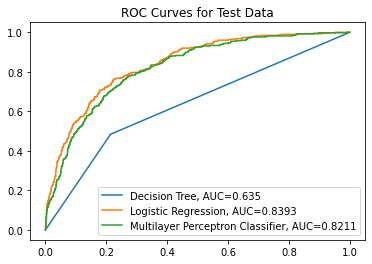

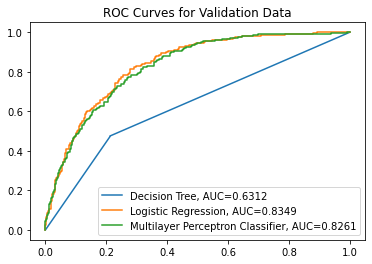

In [86]:
# Plot ROC curves

#set up plotting area for Test Set
plt.figure(0).clf()

#plot ROC curve for Decision Tree

fpr, tpr, _ = metrics.roc_curve(y_test, test_proba_decision_tree)
auc = round(metrics.roc_auc_score(y_test, test_proba_decision_tree), 4)
plt.plot(fpr,tpr,label="Decision Tree, AUC="+str(auc))

#plot ROC curve for Logistic Regression Model
fpr, tpr, _ = metrics.roc_curve(y_test, test_proba_LR)
auc = round(metrics.roc_auc_score(y_test, test_proba_LR), 4)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))


#plot ROC curve for Logistic Regression Model
fpr, tpr, _ = metrics.roc_curve(y_test, test_proba_MLP)
auc = round(metrics.roc_auc_score(y_test, test_proba_MLP), 4)
plt.plot(fpr,tpr,label="Multilayer Perceptron Classifier, AUC="+str(auc))

#add legend
plt.title("ROC Curves for Test Data")
plt.legend()


#set up plotting area for Test Set
plt.figure(1).clf()

#plot ROC curve for Decision Tree

fpr, tpr, _ = metrics.roc_curve(y_validation, validation_proba_decision_tree)
auc = round(metrics.roc_auc_score(y_validation, validation_proba_decision_tree), 4)
plt.plot(fpr,tpr,label="Decision Tree, AUC="+str(auc))

#plot ROC curve for Logistic Regression Model
fpr, tpr, _ = metrics.roc_curve(y_validation, validation_proba_LR)
auc = round(metrics.roc_auc_score(y_validation, validation_proba_LR), 4)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))


#plot ROC curve for Logistic Regression Model
fpr, tpr, _ = metrics.roc_curve(y_validation, validation_proba_MLP)
auc = round(metrics.roc_auc_score(y_validation, validation_proba_MLP), 4)
plt.plot(fpr,tpr,label="Multilayer Perceptron Classifier, AUC="+str(auc))

#add legend
plt.title("ROC Curves for Validation Data")
plt.legend()


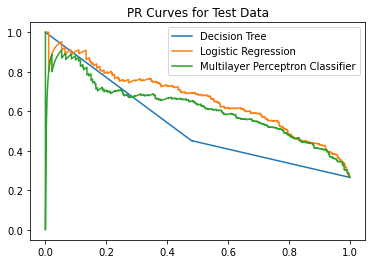

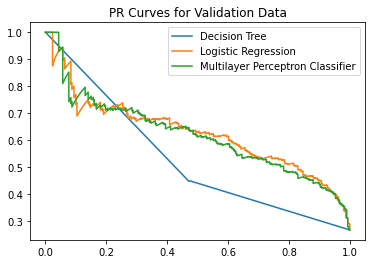

In [87]:
# Plot PR curves
from sklearn.metrics import precision_recall_curve

#set up plotting area for Test Set
plt.figure(0).clf()

#plot PR curve for Decision Tree

precision, recall, thresholds = precision_recall_curve(y_test, test_proba_decision_tree)
plt.plot(recall,precision,label="Decision Tree")

#plot PR curve for Logistic Regression Model
precision, recall, thresholds = precision_recall_curve(y_test, test_proba_LR)
plt.plot(recall,precision,label="Logistic Regression")


#plot PR curve for Logistic Regression Model
precision, recall, thresholds = precision_recall_curve(y_test, test_proba_MLP)
plt.plot(recall,precision,label="Multilayer Perceptron Classifier")

#add legend
plt.title("PR Curves for Test Data")
plt.legend()


#set up plotting area for Test Set
plt.figure(1).clf()

#plot PR curve for Decision Tree

precision, recall, thresholds = precision_recall_curve(y_validation, validation_proba_decision_tree)
plt.plot(recall,precision,label="Decision Tree")

#plot PR curve for Logistic Regression Model
precision, recall, thresholds = precision_recall_curve(y_validation, validation_proba_LR)
plt.plot(recall,precision,label="Logistic Regression")


#plot PR curve for Logistic Regression Model
precision, recall, thresholds = precision_recall_curve(y_validation, validation_proba_MLP)
plt.plot(recall,precision,label="Multilayer Perceptron Classifier")

#add legend
plt.title("PR Curves for Validation Data")
plt.legend()


## [4 points] Handling Class Imbalance with SMOTE

Go through the documentation [here](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html) to understand how to use imbalanced-learn's SMOTE to counter class imbalance in the data.

(a) [1 pt] Split the data into training (80%) and test sets (20%) with a random state of 15. Perform stratified sampling on the target variable while doing so.

Note: The 'stratify' parameter can be used for this in the train_test_split function. 

In [88]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

(b) [2 pts] Perform SMOTE on the training data and print the value counts of the target variable in the data.

In [89]:
# To install imbalanced-learn library use pip install imbalanced-learn command
#!pip install imbalanced-learn command
from imblearn.over_sampling import SMOTE

# Answer here
smote = SMOTE(random_state=15)
X_res, y_res = smote.fit_resample(X_train, y_train)

y_res.value_counts()

0    4130
1    4130
Name: Churn, dtype: int64

(c) [1 pt] Split the updated training data (on which SMOTE has been run) further into training (80%) and validation sets (20%) with a random state of 15. Perform stratified sampling on the target variable while doing so.

Note: The 'stratify' parameter can be used for this in the train_test_split function. 

In [90]:
# Answer here
train_X, validation_X, train_y, validation_y = train_test_split(X_res, y_res, test_size=0.2, random_state=15, stratify=y_res)

In [91]:
# Number of classes in training Data
train_y.value_counts()

1    3304
0    3304
Name: Churn, dtype: int64

In [92]:
# Number of classes in validation Data
validation_y.value_counts()

1    826
0    826
Name: Churn, dtype: int64

## [2 points] Retraining the Classifiers

Now that we have created synthetic samples of the minority class, let's proceed further to see if we see any improvements in our results. For the two models - Logistic regressor and MLP, do the folowing:

(a) [1 pt] Train a model on the training dataset. <br>
(b) [1 pt] Make predictions on the test data using the trained model and print confusion matrix for both - the validation and the test data.

In [94]:
# Logistic Regression

LR = LogisticRegression(random_state=10)
LR = LR.fit(train_X, train_y)

validation_pred_LR = LR.predict(validation_X)
test_pred_LR = LR.predict(X_test)
validation_proba_LR = LR.predict_proba(validation_X)[::,1]
test_proba_LR = LR.predict_proba(X_test)[::,1]

validation_cm=confusion_matrix(validation_y, validation_pred_LR)
test_cm=confusion_matrix(y_test, test_pred_LR)

print("Confusion Matrix for Validation Set:\n",validation_cm)
print("So, Accuracy on Validation Set is:",(validation_cm[0][0]+validation_cm[1][1])/(validation_cm[0][0]+validation_cm[1][1]+validation_cm[0][1]+validation_cm[1][0])*100)
print("So, Recall on Validation Set is:",(validation_cm[1][1])/(validation_cm[1][0]+validation_cm[1][1]))
print("So, Precision on Validation Set is:",(validation_cm[1][1])/(validation_cm[0][1]+validation_cm[1][1]))
print("So, F1 Score on Validation Set is:",(f1_score(validation_y,validation_pred_LR)))

print("\n\nConfusion Matrix for Test Set:\n",test_cm)
print("So, Accuracy on Test Set is:",(test_cm[0][0]+test_cm[1][1])/(test_cm[0][0]+test_cm[1][1]+test_cm[0][1]+test_cm[1][0])*100)
print("So, Recall on Test Set is:",(test_cm[1][1])/(test_cm[1][0]+test_cm[1][1]))
print("So, Precision on Test Set is:",(test_cm[1][1])/(test_cm[0][1]+test_cm[1][1]))
print("So, F1 Score on Test Set is:",(f1_score(y_test,test_pred_LR)))

Confusion Matrix for Validation Set:
 [[604 222]
 [137 689]]
So, Accuracy on Validation Set is: 78.26876513317191
So, Recall on Validation Set is: 0.8341404358353511
So, Precision on Validation Set is: 0.756311745334797
So, F1 Score on Validation Set is: 0.7933218192285549


Confusion Matrix for Test Set:
 [[777 256]
 [ 89 285]]
So, Accuracy on Test Set is: 75.47974413646055
So, Recall on Test Set is: 0.7620320855614974
So, Precision on Test Set is: 0.5268022181146026
So, F1 Score on Test Set is: 0.6229508196721313


In [95]:
# MLP

MLP = gr.best_estimator_
MLP = MLP.fit(train_X, train_y)

validation_pred_MLP = MLP.predict(validation_X)
test_pred_MLP = MLP.predict(X_test)
validation_proba_MLP = MLP.predict_proba(validation_X)[::,1]
test_proba_MLP = MLP.predict_proba(X_test)[::,1]

validation_cm=confusion_matrix(validation_y, validation_pred_MLP)
test_cm=confusion_matrix(y_test, test_pred_MLP)

print("Confusion Matrix for Validation Set:\n",validation_cm)
print("So, Accuracy on Validation Set is:",(validation_cm[0][0]+validation_cm[1][1])/(validation_cm[0][0]+validation_cm[1][1]+validation_cm[0][1]+validation_cm[1][0])*100)
print("So, Recall on Validation Set is:",(validation_cm[1][1])/(validation_cm[1][0]+validation_cm[1][1]))
print("So, Precision on Validation Set is:",(validation_cm[1][1])/(validation_cm[0][1]+validation_cm[1][1]))
print("So, F1 Score on Validation Set is:",(f1_score(validation_y,validation_pred_MLP)))

print("\n\nConfusion Matrix for Test Set:\n",test_cm)
print("So, Accuracy on Test Set is:",(test_cm[0][0]+test_cm[1][1])/(test_cm[0][0]+test_cm[1][1]+test_cm[0][1]+test_cm[1][0])*100)
print("So, Recall on Test Set is:",(test_cm[1][1])/(test_cm[1][0]+test_cm[1][1]))
print("So, Precision on Test Set is:",(test_cm[1][1])/(test_cm[0][1]+test_cm[1][1]))
print("So, F1 Score on Test Set is:",(f1_score(y_test,test_pred_MLP)))

Confusion Matrix for Validation Set:
 [[643 183]
 [143 683]]
So, Accuracy on Validation Set is: 80.26634382566587
So, Recall on Validation Set is: 0.8268765133171913
So, Precision on Validation Set is: 0.7886836027713626
So, F1 Score on Validation Set is: 0.8073286052009457


Confusion Matrix for Test Set:
 [[806 227]
 [115 259]]
So, Accuracy on Test Set is: 75.69296375266525
So, Recall on Test Set is: 0.6925133689839572
So, Precision on Test Set is: 0.5329218106995884
So, F1 Score on Test Set is: 0.6023255813953488


C:\Users\parth\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


## [9 points] Plotting and Comparison
a) [1 pt] For the two classifiers (Logistic regression and MLP) - plot the ROC Curves in a single graph, display the AUC-ROC scores in this plot as well on both the validation and the test data. Use one graph for validation data and one graph for test data. <br>
b) [1 pt] Plot the Precision-Recall curves for the two classifiers in a single graph on both the validation and the test data. Use one graph for validation data and one graph for test data. <br>
c) [7 pts] Compare and contrast the performance of the classifiers with reference to these two plots and with reference to the plots that were computed before using SMOTE. Specifically comment on what you observed regarding the difference in performance on the validation vs. the test dataset, which is a better representative of the actual/original problem.

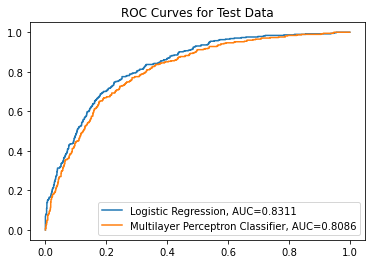

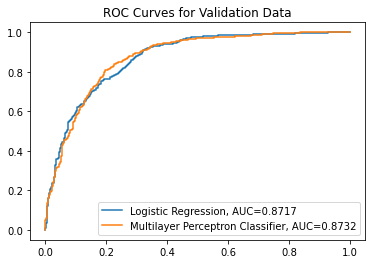

In [96]:
# Plot ROC curves
# Plot ROC curves

#set up plotting area for Test Set
plt.figure(0).clf()


#plot ROC curve for Logistic Regression Model
fpr, tpr, _ = metrics.roc_curve(y_test, test_proba_LR)
auc = round(metrics.roc_auc_score(y_test, test_proba_LR), 4)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))


#plot ROC curve for Logistic Regression Model
fpr, tpr, _ = metrics.roc_curve(y_test, test_proba_MLP)
auc = round(metrics.roc_auc_score(y_test, test_proba_MLP), 4)
plt.plot(fpr,tpr,label="Multilayer Perceptron Classifier, AUC="+str(auc))

#add legend
plt.title("ROC Curves for Test Data")
plt.legend()


#set up plotting area for Test Set
plt.figure(1).clf()


#plot ROC curve for Logistic Regression Model
fpr, tpr, _ = metrics.roc_curve(validation_y, validation_proba_LR)
auc = round(metrics.roc_auc_score(validation_y, validation_proba_LR), 4)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))


#plot ROC curve for Logistic Regression Model
fpr, tpr, _ = metrics.roc_curve(validation_y, validation_proba_MLP)
auc = round(metrics.roc_auc_score(validation_y, validation_proba_MLP), 4)
plt.plot(fpr,tpr,label="Multilayer Perceptron Classifier, AUC="+str(auc))

#add legend
plt.title("ROC Curves for Validation Data")
plt.legend()


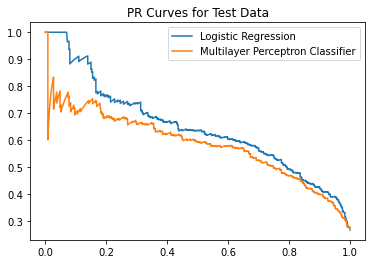

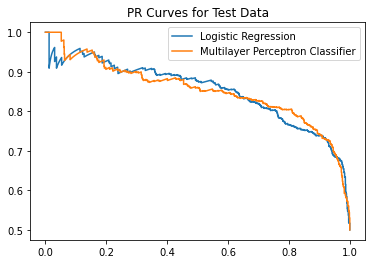

In [97]:
# Plot PR curves
from sklearn.metrics import precision_recall_curve

#set up plotting area for Test Set
plt.figure(0).clf()

#plot PR curve for Logistic Regression Model
precision, recall, thresholds = precision_recall_curve(y_test, test_proba_LR)
plt.plot(recall,precision,label="Logistic Regression")


#plot PR curve for Logistic Regression Model
precision, recall, thresholds = precision_recall_curve(y_test, test_proba_MLP)
plt.plot(recall,precision,label="Multilayer Perceptron Classifier")

#add legend
plt.title("PR Curves for Test Data")
plt.legend()


#set up plotting area for Test Set
plt.figure(1).clf()


#plot PR curve for Logistic Regression Model
precision, recall, thresholds = precision_recall_curve(validation_y, validation_proba_LR)
plt.plot(recall,precision,label="Logistic Regression")


#plot PR curve for Logistic Regression Model
precision, recall, thresholds = precision_recall_curve(validation_y, validation_proba_MLP)
plt.plot(recall,precision,label="Multilayer Perceptron Classifier")

#add legend
plt.title("PR Curves for Test Data")
plt.legend()


c) [7 pts] Compare and contrast the performance of the classifiers with reference to these two plots and with reference to the plots that were computed before using SMOTE. Specifically comment on what you observed regarding the difference in performance on the validation vs. the test dataset, which is a better representative of the actual/original problem.

**Answer:**

SMOTE aims to balance class distribution by randomly increasing minority class examples by replicating them.
SMOTE synthesises new minority class instances by generating the virtual training records via linear interpolation for the minority class. These synthetic training records are generated by randomly selecting one or more of the k-nearest neighbors for each example in the minority class. 

Using SMOTE rebalances the proportion of positive and negative class data points in a binary classification problem. We will be using the F1 score to evaluate the performance of the Logistic Regression and Multilayer Perceptron Classifier Models before and after applying SMOTE.

The results are as follows:

| Model | Validation Set | Test Set |
| :- | :-: | :-: |
| Logistic Regression Before SMOTE | 0.5704 | 0.5982 |
| Logistic Regression After SMOTE | 0.7933 | 0.6229 |
| MLP Classifier Before SMOTE | 0.5502 | 0.5681 |
| MLP Classifier After SMOTE | 0.8073 | 0.6023 |

We should me more interested in the model's performance on the Test set because in the Training and Validation sets we had rebalanced the class proportions and the datasets were no longer representative of the original problem. As a result, we should not be considering a massive imrpovement in F1 scores for validation test to be a massive improvement in our model.

Clearly, we can see in the above table that the F1 scores for Validation sets for both the Logistic Regression and MLP Classifier Models have improved significantly after applying SMOTE. But we are more interested in the performance on Test set. However, the improvements in F1 score in the Test set are pretty modest. So, SMOTE has improved our models slightly in this case. But the change is nothing too drastic.

# Question 4: Bayesian Belief Networks [15 pts]



Refer to the Bayesian Network Belief image (uploaded with the notebook on canvas) for this question. 

All nodes are binary and can take 0/1 values

The probabilities are given below:

P(Season = 1) = .001   
P(Atmospheric Pressure = 1) = .0.002


P(Rain = 1 | Season = 0, Atmospheric Pressure = 0) = .001  
P(Rain = 1 | Season = 0, Atmospheric Pressure = 1) = .29  
P(Rain = 1 | Season = 1, Atmospheric Pressure = 0) = .94  
P(Rain = 1 | Season = 1, Atmospheric Pressure = 1) = .95

P(Umbrella = 1 | Rain = 1) = .9  
P(Umbrella = 1 | Rain = 0) = .05

For the given Bayesian network, Compute the following probabilities : 


**(a) [4 pts]** Find the probability that  Umbrella = 0 

**(b) [4 pts]** Given that there is low Atmospheric Pressure (Atmospheric Pressure = 0), what is the probability that Rain = 1

**(c) [7 pts]** Given that it rains(Rain = 1), what is the probability that the it is rainy season (Season = 1)

# Answers:

**(a)** Let **A** represent the Random Variable **Atmospheric Pressure**, **S** represent the Random Variable **Season**, R represent the Random Variable **Rain** and **U** represent the random variable **Umbrella**.

So, we know -

$$
P(U=0) = P(U=0|R=0)P(R=0) + P(U=0|R=1)P(R=1)
$$

$$
= 0.95*P(R=0) + 0.1*P(R=1)
$$


Now, 

$$
P(R=1) = P(R=1|S=0,A=0)P(S=0,A=0) +
P(R=1|S=0,A=1)P(S=0,A=1) +
P(R=1|S=1,A=0)P(S=1,A=0) +
P(R=1|S=1,A=1)P(S=1,A=1)
$$


So, 

$$
P(R=1) = (0.001*0.999*0.998) + (0.29*0.999*0.002) + (0.94*0.001*0.998) + (0.95*0.001*0.002)
=(0.000997)+(0.00057942)+(0.00093812)+(0.0000019)
=0.00251644
$$

$$
P(Rain=0) = 1-P(Rain=1) = 1 - 0.00251644 = 0.99748356
$$

$$
P(U=0) = 0.95*P(R=0) + 0.1*P(R=1) = (0.95*0.99748356) + (0.1*0.00251644) = 0.947861026
$$

**(b)** Let **A** represent the Random Variable **Atmospheric Pressure**, **S** represent the Random Variable **Season**, R represent the Random Variable **Rain** and **U** represent the random variable **Umbrella**.

So, we need to compute **P(R=1|A=0)**.

$$
  P(R=1|A=0) =\frac{P(R=1,A=0)}{P(A=0)}\
$$ 

$$
  =\frac{P(R=1,A=0,S=0)+P(R=1,A=0,S=1)}{P(A=0)}\
$$ 

$$
  =\frac{P(A=0).P(S=0).P(R=1|A=0,S=0)+P(A=0).P(S=1).P(R=1|A=0,S=1)}{P(A=0)}\
$$ 


$$
  =\frac{(0.998).(0.999).(0.001)+(0.998).(0.001).(0.94)}{(0.998)}\
$$ 

$$
  =0.001939
$$ 

**(c)** Let **A** represent the Random Variable **Atmospheric Pressure**, **S** represent the Random Variable **Season**, R represent the Random Variable **Rain** and **U** represent the random variable **Umbrella**.

So, we need to compute **P(S=1|R=1)**.

So, using Bayes' Theorem-
$$
  P(S=1|R=1) =\frac{P(R=1|S=1).P(S=1)}{P(R=1)}\
$$ 

Substituting values from parts (a) and (b), we get- 
$$
  P(S=1|R=1) =\frac{P(R=1|S=1).(0.001)}{(0.00251644)}\   
$$ 

$$
  P(S=1|R=1) =\frac{P(R=1|S=1)}{2.51644}\   
$$ 

So, we just need to estimate **P(R=1|S=1)**

$$
  P(R=1|S=1) = \frac{P(R=1,S=1)}{P(S=1)}\    
$$ 


$$
  = \frac{P(R=1,S=1)}{0.001}\  
$$ 

$$
  = \frac{P(R=1,S=1,A=0)+P(R=1,S=1,A=1)}{0.001}\  
$$ 

$$
  = \frac{P(S=1).P(A=0).P(R=1|S=1,A=0)+P(S=1).P(A=1).P(R=1|S=1,A=1)}{0.001}\  
$$ 


$$
  = \frac{(0.001).(0.998).(0.94)+(0.001).(0.002).(0.95)}{0.001}\  
$$ 

$$
 P(R=1|S=1) = 0.94002
$$ 

Substituting this result in the previous equation, we get - 

$$
  P(S=1|R=1) =\frac{P(R=1|S=1)}{2.51644}\   
$$ 

$$
  P(S=1|R=1) =\frac{0.94002}{2.51644}\   
$$ 

$$
  P(S=1|R=1) = 0.37355  
$$ 


# Question 5: Support Vector Machines [10 pts]

1. [3 pts] Explain in what sense the Support Vector Machine seeks an optimal answer in the space of linear classifiers.
2. [3 pts] Describe how a slack variable works.
3. [4 pts] Explain how the SVM framework can be extended in order to provide non-linear decision boundaries.

## Answers

**1.** Support Vector Machine is a kind of maximum margin classifier having soft boundary. When we ignore the soft boundary, the maximum margin classifier generates a linear boundary in the feature space in order to maximize the distance between two classes. Hence, SVM finds the optimal decision boundary such that distance as well as the margin is maximum between the two classes even though there can be many decision boundaries. As a result of this maximization, it will perform better on the unseen data. In addition to this, the decision bondary that is found out is dependent on the observations that were used to maximize the margin between two classes. Hence, even if we add new data, the decision boundary does not change as the value of margin is not getting impacted. As a result, the decision boundary obtained through SVM is independent of the new data.

**2.** The decision boundary method explained in Part1 is only applicable when the two classes are properly segregated i.e. there is no overlap between them. However, is there is some overlap, then some of the observations might pass through the margin. Hence, the slack variables allow for the violation of the constraints. 

However, if there are no slack variables,the decision boundary will have to try hard to separate the classes which can result in overfitting of the data. Thereby, the slack variables are introduced generally, which reduces the variance by incrasing bias i.e bias-variance trade-off comes into picture. So, as we increase the violations, variance is increased and to counter that more bias is introduced. Hence, the slack variable is used to get the optimal result by tuning it.

**3.** Support Vector Machine models the linear decision boundary using kernel space i.e. using the kernel space it transforms the non-linearity features in order to seperate the classes using linear boundary in transformed space. Please find attached the picture explaning the same:

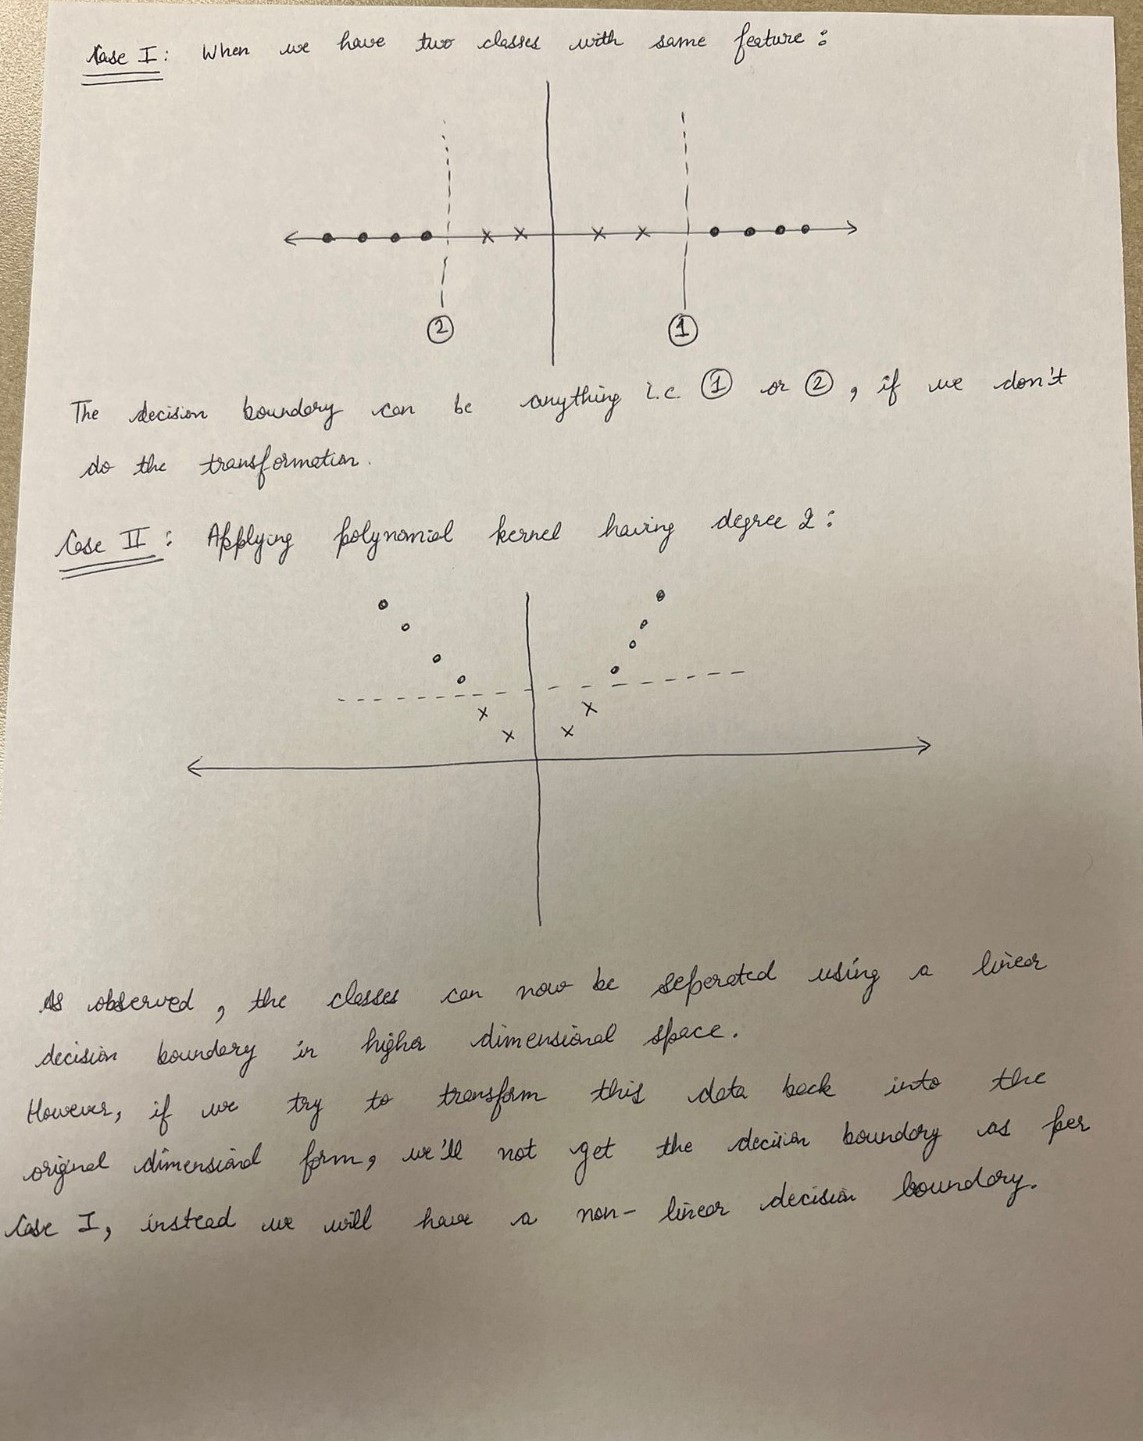